In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [ ]:
data = pd.read_csv("movies.csv")

In [ ]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
data.shape

(7668, 15)

In [ ]:
#missing values
data.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [ ]:
np.sort(data['score'].unique())

array([1.9, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
       3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
       4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8,
       5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1,
       7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4,
       8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.3, nan])

Score is a discrete feature hence we can replace null values with mode

In [ ]:
data['score'].mode()[0]

6.6

In [ ]:
data['score'] = data['score'].fillna(data['score'].mode()[0])

In [ ]:
data['released'].unique()

array(['June 13, 1980 (United States)', 'July 2, 1980 (United States)',
       'June 20, 1980 (United States)', ...,
       'October 23, 2020 (United States)', 'April 27, 2020 (Cameroon)',
       'August 19, 2020 (United States)'], dtype=object)

In [ ]:
# drop the nan values of released column
data = data[~data['released'].isnull()]

In [ ]:
data['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

Since rating is also a discrete value column we can replace the nan values with mode. 

In [ ]:
data['rating'].mode()[0]

'R'

In [ ]:
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])

In [ ]:
data.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          3
director       0
writer         3
star           1
country        1
budget      2169
gross        187
company       15
runtime        2
dtype: int64

In [ ]:
len(data['votes'].unique())

937

In [ ]:
# remove rows with votes as missing
data = data[~data['votes'].isnull()]

In [ ]:
data['writer'].unique()

array(['Stephen King', 'Henry De Vere Stacpoole', 'Leigh Brackett', ...,
       'Lisa Huston', 'Lynno Lovert', 'Pereko Mosia'], dtype=object)

In [ ]:
len(data['writer'].unique())

4533

In [ ]:
data = data[~data['writer'].isnull()]

In [ ]:
data['star'].unique()

array(['Jack Nicholson', 'Brooke Shields', 'Mark Hamill', ...,
       'Shannon Bond', 'Onyama Laura', 'Siyabonga Mabaso'], dtype=object)

In [ ]:
len(data['star'].unique())

2811

In [ ]:
data = data[~data['star'].isnull()]

In [ ]:
data['country'].unique()

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Libya', 'Italy', 'Soviet Union', 'France',
       'Hong Kong', 'South Korea', 'Sweden', 'Spain', 'Mexico',
       'Switzerland', 'Netherlands', 'New Zealand', 'Philippines',
       'Israel', 'Japan', 'Hungary', 'Brazil', 'Yugoslavia', 'Argentina',
       'Taiwan', 'Ireland', 'Denmark', 'Germany', 'Iran', 'China',
       'Belgium', 'Austria', 'Portugal', 'Vietnam',
       'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic',
       'Norway', 'India', 'Jamaica', 'Aruba', 'Thailand', 'Colombia',
       'Romania', 'United Arab Emirates', 'Indonesia', 'Turkey', 'Serbia',
       'Poland', 'Kenya', 'Finland', 'Iceland', 'Chile', 'Panama',
       'Malta', 'Lebanon', nan], dtype=object)

In [ ]:
data['country'].mode()[0]

'United States'

In [ ]:
data['country'] = data['country'].fillna(data['country'].mode()[0])

In [ ]:
data['company'].mode()[0]

'Universal Pictures'

In [ ]:
data['company'] = data['company'].fillna(data['company'].mode()[0])

In [ ]:
data.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2166
gross        183
company        0
runtime        2
dtype: int64

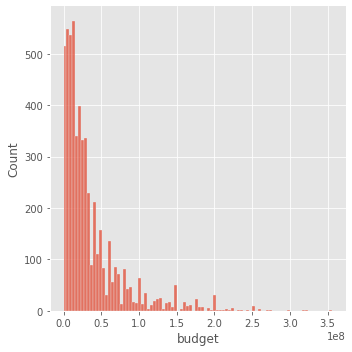

In [ ]:
sns.displot(data['budget'])

Distribution of budget is skewed so it is better to replace null values by median.

In [ ]:
data['budget'].median()

21000000.0

In [ ]:
data['budget'] = data['budget'].fillna(data['budget'].median())

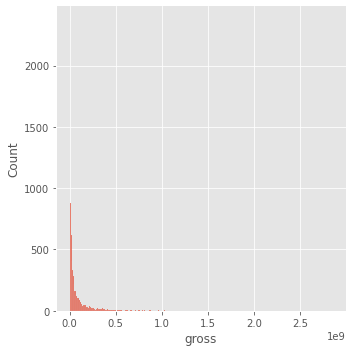

In [ ]:
sns.displot(data['gross'])

Gross is skewed as well so we replace nan values with median. 

In [ ]:
data['gross'].median()

20207126.5

In [ ]:
data['gross'] = data['gross'].fillna(data['gross'].median())

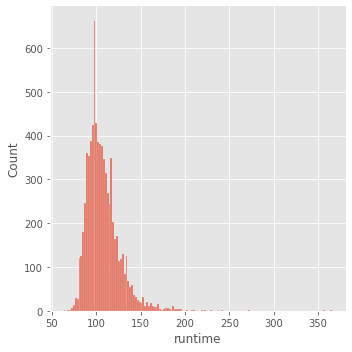

In [ ]:
sns.displot(data['runtime'])

Distribution of runtime is skewed so it is better to replace null values by median.



In [ ]:
data['runtime'].median()

104.0

In [ ]:
data['runtime'] = data['runtime'].fillna(data['runtime'].median())

In [ ]:
data.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [ ]:
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
#change data types of columns
data['budget'] = data['budget'].astype('int64')
data['gross'] = data['gross'].astype('int64')
data['votes'] = data['votes'].astype('int64')
data['runtime'] = data['runtime'].astype('int64')

In [ ]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [ ]:
data.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7660,Aloha Surf Hotel,R,Comedy,2020,"November 5, 2020 (United States)",7.1,14,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,21000000,20207126,Abominable Pictures,90
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,20207126,Universal Pictures,90
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,21000000,20207126,Cactus Blue Entertainment,90
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,20207126,Embi Productions,104
7667,Tee em el,R,Horror,2020,"August 19, 2020 (United States)",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,21000000,20207126,PK 65 Films,102


In [ ]:
data = data.sort_values(by=['gross'],inplace=False,ascending=False)
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


Guesses for high correlation:

 - Company with Budget 

 - Budget with gross

Text(0.5, 1.0, 'Budget vs Gross earning')

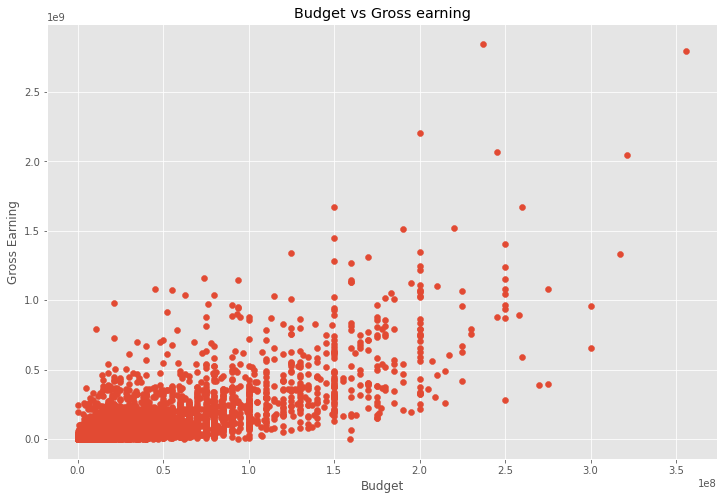

In [ ]:
plt.scatter(x=data['budget'],y=data['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross Earning')
plt.title('Budget vs Gross earning')

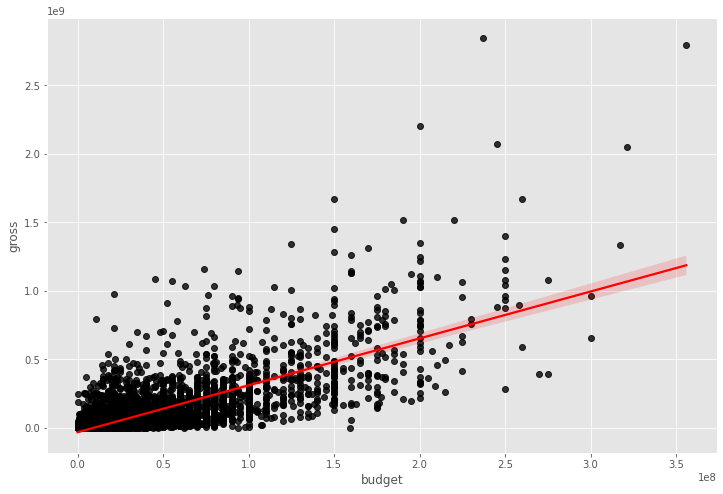

In [ ]:
sns.regplot(x='budget',y='gross',data=data,scatter_kws={'color':'black'},line_kws={'color':'red'})

In [ ]:
data.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.098527,0.223064,0.291966,0.259854,0.120076
score,0.098527,1.000000,0.409552,0.062328,0.185703,0.400485
votes,0.223064,0.409552,1.000000,0.459853,0.632213,0.309186
budget,0.291966,0.062328,0.459853,1.000000,0.745321,0.273221
gross,0.259854,0.185703,0.632213,0.745321,1.000000,0.244408
runtime,0.120076,0.400485,0.309186,0.273221,0.244408,1.000000


- By observing the regression plot and correlation we can say that the budget and gross has high positive correlation. 
- Also we can observe that the lower budget movies generally have smaller gross earnings.  

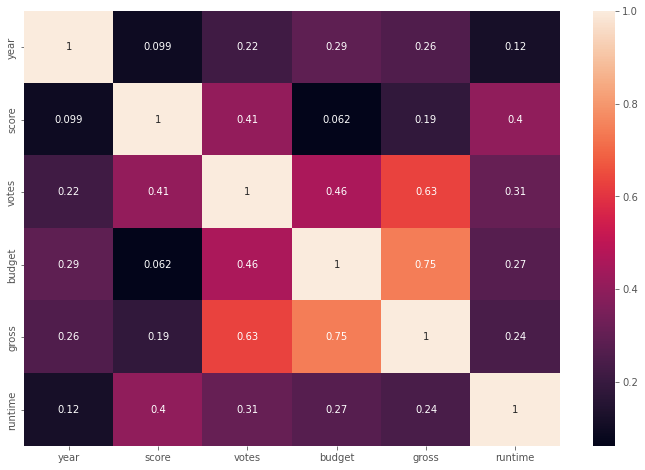

In [ ]:
corr_mat = data.corr()
sns.heatmap(corr_mat,annot=True)

- Another observation is that we can see that votes also has high correlation with gross eearnings.

In [ ]:
# company vs budget
# first convert all categorical data to numeric categories
data_num = data.copy()

for col in data_num.columns:
  if(data_num[col].dtype=='object'):
    data_num[col] = data_num[col].astype('category')
    data_num[col] = data_num[col].cat.codes

data_num.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,694,7.8,1100000,1155,1776,2330,55,237000000,2847246203,2248,162
7445,535,5,0,2019,181,8.4,903000,162,741,2237,55,356000000,2797501328,1601,181
3045,6887,5,6,1997,702,7.8,1100000,1155,1776,1592,55,200000000,2201647264,2248,194
6663,5140,5,0,2015,696,7.8,876000,1125,2547,522,55,245000000,2069521700,1535,138
7244,536,5,0,2018,190,8.4,897000,162,741,2237,55,321000000,2048359754,1601,149


In [ ]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


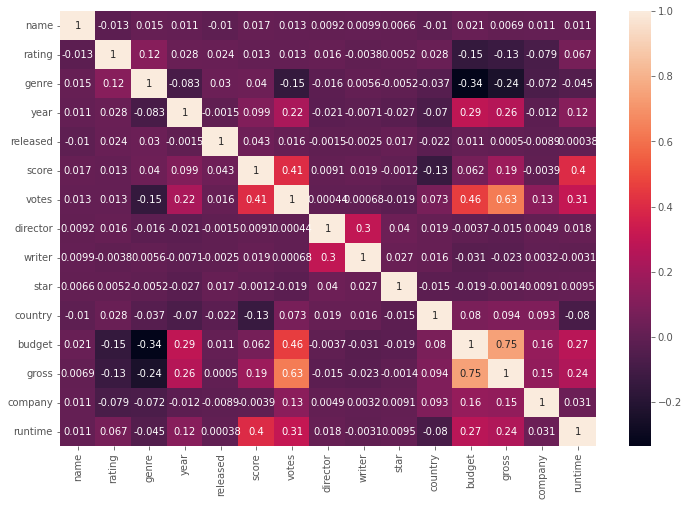

In [ ]:
corr_mat = data_num.corr()
sns.heatmap(corr_mat,annot=True)

High correlation observed:
- gross vs votes (0.63)
- gross vs budget (0.75)
- score vs runtime (0.4)
- budget vs votes (0.46)
- votes vs score (0.41)